In [0]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

In [0]:
#   plot the data on a figure
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], '*', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], '^', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

In [0]:
#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt

In [0]:
# Generate some data blobs.  Data will be either 0 or 1 when 2 is number of centers.
# X is a [number of samples, 2] sized array. X[sample] contains its x,y position of the sample in the space
# ex: X[1] = [1.342, -2.3], X[2] = [-4.342, 2.12]
# y is a [number of samples] sized array. y[sample] contains the class index (ie. 0 or 1 when there are 2 centers)
# ex: y[1] = 0 , y[1] = 1

X, y = make_blobs(n_samples=1000,centers=2, random_state=42)

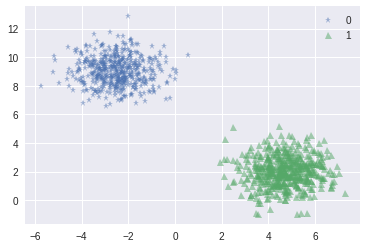

In [13]:
pl = plot_data(plt, X, y)

In [0]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
#Create the Keras Model
from keras.models import  Sequential
from keras.layers import  Dense
from keras.optimizers import  Adam

In [0]:
#Simple Sequential Model
model = Sequential()

In [0]:
model.add(Dense(1,input_shape=(2,),activation="sigmoid"))

In [0]:
#Compile the model. Minimize Crossentropy for binary. Maximize for accuracy
model.compile(Adam(lr=0.05),"binary_crossentropy",metrics=["accuracy"])

In [27]:
#Fit the model data with the data from make_blobs. Make 100 cycles through the data
model.fit(X_train, y_train, epochs=100,verbose=2)

Epoch 1/100
 - 0s - loss: 1.3908e-04 - acc: 1.0000
Epoch 2/100
 - 0s - loss: 1.3688e-04 - acc: 1.0000
Epoch 3/100
 - 0s - loss: 1.3475e-04 - acc: 1.0000
Epoch 4/100
 - 0s - loss: 1.3272e-04 - acc: 1.0000
Epoch 5/100
 - 0s - loss: 1.3035e-04 - acc: 1.0000
Epoch 6/100
 - 0s - loss: 1.2839e-04 - acc: 1.0000
Epoch 7/100
 - 0s - loss: 1.2649e-04 - acc: 1.0000
Epoch 8/100
 - 0s - loss: 1.2419e-04 - acc: 1.0000
Epoch 9/100
 - 0s - loss: 1.2239e-04 - acc: 1.0000
Epoch 10/100
 - 0s - loss: 1.2063e-04 - acc: 1.0000
Epoch 11/100
 - 0s - loss: 1.1867e-04 - acc: 1.0000
Epoch 12/100
 - 0s - loss: 1.1706e-04 - acc: 1.0000
Epoch 13/100
 - 0s - loss: 1.1500e-04 - acc: 1.0000
Epoch 14/100
 - 0s - loss: 1.1340e-04 - acc: 1.0000
Epoch 15/100
 - 0s - loss: 1.1187e-04 - acc: 1.0000
Epoch 16/100
 - 0s - loss: 1.0994e-04 - acc: 1.0000
Epoch 17/100
 - 0s - loss: 1.0841e-04 - acc: 1.0000
Epoch 18/100
 - 0s - loss: 1.0685e-04 - acc: 1.0000
Epoch 19/100
 - 0s - loss: 1.0534e-04 - acc: 1.0000
Epoch 20/100
 - 0s - 

In [28]:
#Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)


300/300 [==============================] - 0s 60us/step


In [29]:
#Print Test Accuracy
print("\n\n Test Loss:", eval_result[0],"Test accuracy:",eval_result[1])



 Test Loss: 6.1727804131805895e-06 Test accuracy: 1.0


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

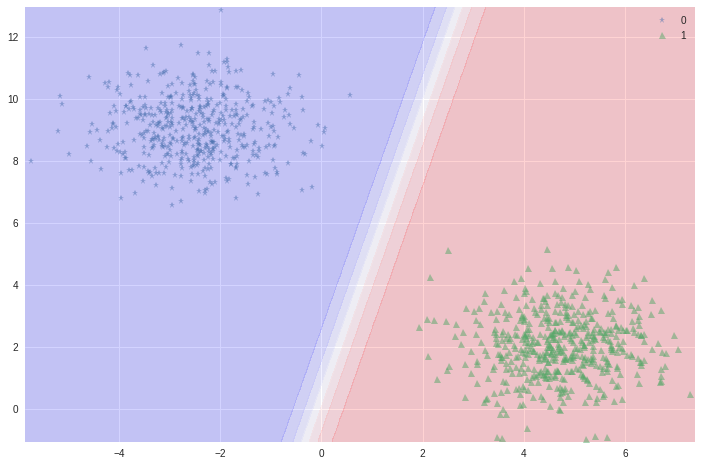

In [30]:
plot_decision_boundary(model, X, y)